In [1]:
import rasterio
import rasterio.plot
import os

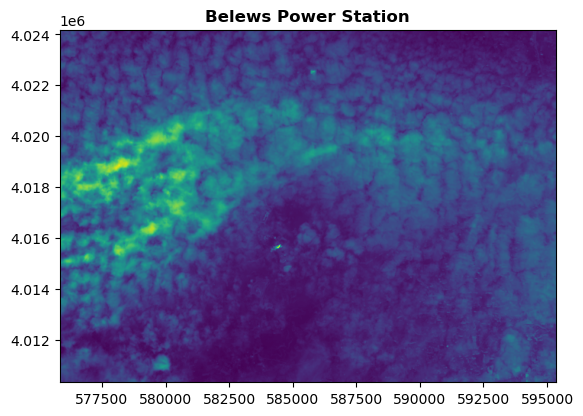

<AxesSubplot:title={'center':'Belews Power Station'}>

In [2]:
dataset = rasterio.open("../salmankarim/Downloads/Landsat8 22-23/LS8_16_35_2022-01-31.tif")
rasterio.plot.show(dataset, title = "Belews Power Station")

In [7]:
dataset

<open DatasetReader name='../salmankarim/Downloads/Landsat8 22-23/LS8_16_35_2022-01-31.tif' mode='r'>

In [5]:
#check number of bands
dataset.count

6

In [8]:
dataset.bounds

BoundingBox(left=575835.0, bottom=4010325.0, right=595335.0, top=4024185.0)

In [9]:
dataset.indexes

(1, 2, 3, 4, 5, 6)

In [11]:
#Reading raster data
band2 = dataset.read(1)
band2

array([[0.20159766, 0.20367521, 0.19876464, ..., 0.12741032, 0.13080995,
        0.13643822],
       [0.19615826, 0.19691373, 0.19876464, ..., 0.12911014, 0.13118769,
        0.12827912],
       [0.20756589, 0.20401518, 0.19823581, ..., 0.12737255, 0.12869462,
        0.12691927],
       ...,
       [0.18788585, 0.1836552 , 0.17417404, ..., 0.17217204, 0.16046222,
        0.15929124],
       [0.18618603, 0.17999117, 0.17175652, ..., 0.18376853, 0.1770826 ,
        0.1723609 ],
       [0.1818043 , 0.17447622, 0.16692151, ..., 0.18841468, 0.1875081 ,
        0.18127547]], dtype=float32)

In [12]:
#Spatial indexing

x, y = (dataset.bounds.left + 100000, dataset.bounds.top - 50000)
row, col = dataset.index(x, y)
row, col

(1666, 3333)

In [14]:
#The coordinates of the center of the image can be computed like this.
dataset.xy(dataset.height // 2, dataset.width // 2)

(585600.0, 4017240.0)

In [16]:
import numpy as np
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
Z2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
Z = 10.0 * (Z2 - Z1)
Z

array([[0.02122529, 0.02293761, 0.0247696 , ..., 0.00180847, 0.00163782,
        0.00148217],
       [0.02243408, 0.02424392, 0.02618023, ..., 0.00191146, 0.00173109,
        0.00156658],
       [0.02369399, 0.02560546, 0.02765053, ..., 0.00201881, 0.00182831,
        0.00165456],
       ...,
       [0.00336547, 0.00363697, 0.00392745, ..., 0.00028675, 0.00025969,
        0.00023501],
       [0.00311622, 0.00336762, 0.00363659, ..., 0.00026551, 0.00024046,
        0.00021761],
       [0.00288328, 0.00311589, 0.00336475, ..., 0.00024567, 0.00022248,
        0.00020134]])

In [17]:
from rasterio.transform import Affine
res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)
transform

Affine(0.03333333333333333, 0.0, -4.016666666666667,
       0.0, 0.03333333333333333, -3.0166666666666666)

In [ ]:
new_dataset = rasterio.open(
    '/tmp/new.tif',
    'w',
    driver='GTiff',
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
    crs='+proj=latlong',
    transform=transform,
)

In [ ]:
new_dataset.write(Z, 1)
new_dataset.close()

with rasterio.open(
    '/tmp/new.tif',
    'w',
    driver='GTiff',
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
    crs='+proj=latlong',
    transform=transform,
) as dst:
    dst.write(Z, 1)